# Customer Churn Project 

# Problem statement:

You are the Data Scientist at a telecom company whose customers are churning out to its competitors. You have to analyse the data of your company and find insights and stop your customers from churning out to other telecom companies.

In [1]:
#import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from time import time

In [3]:
#To find inference time of all the models
def timer(function, input, num_times=10):
    times_list = list()
    for i in range(num_times):
        start_time = time()
        y_pred = function(input)
        end_time = time()-start_time
        times_list.append(end_time)
        del start_time, end_time
    return np.mean(times_list)

In [4]:
#load dataset
CC = pd.read_csv('Telco-Customer-Churn.csv')
CC.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Exploration (Initial EDA and data cleaning)

In [5]:
CC.shape

(7043, 21)

In [6]:
#Information about the data 
CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#To check on various statistical charachteristics of numerical features
CC.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
#To check on various statistical charachteristics of non-numerical features
CC.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [9]:
CC.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
#check missing values
CC.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
CC = CC.drop(['customerID'],axis=1)
CC.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
CC[CC["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
#converting datatype of TotalCharges into numeric
CC['TotalCharges'] = pd.to_numeric(CC.TotalCharges, errors='coerce')
CC.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

errors='coerce': If the error argument is passed as coerce, then invalid parsing will be set as NaN. If the error 
argument is passed as ignore, then invalid parsing will return the input.

In [14]:
#replacing the missing values in TotalCharges with the mean
CC["TotalCharges"].fillna(CC["TotalCharges"].mean(),inplace=True)
CC.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
CC[CC["tenure"] == 0]
#removing the rows where tenure = 0
CC.drop(labels=CC[CC["tenure"] == 0].index, axis = 0, inplace = True)

In [16]:
CC.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Exploration (Continue EDA)

In [17]:
CC['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [18]:
CC['Churn'].value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

In [19]:
#relation between gender and churn
pd.crosstab(CC["gender"],CC["Churn"])

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


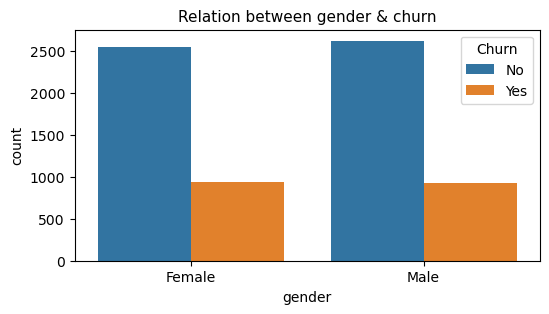

In [20]:
#Create plot
fig, ax = plt.subplots(figsize = (6,3))
ax.set_title("Relation between gender & churn",size=11)
sns.countplot(x='gender', hue='Churn', data=CC)
plt.show()

In [21]:
#relation between contract and churn
pd.crosstab(CC["Contract"],CC["Churn"],normalize="index")

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887228,0.112772
Two year,0.971513,0.028487


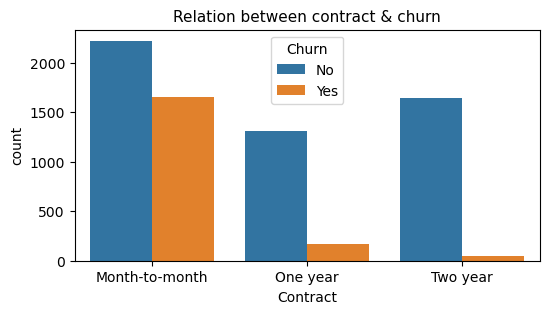

In [22]:
#Create plot
fig, ax = plt.subplots(figsize = (6,3))
ax.set_title("Relation between contract & churn",size=11)
sns.countplot(x='Contract', hue='Churn', data=CC)
plt.show()

Customers with monthly contract are more likely to churn

In [23]:
CC['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [24]:
pd.crosstab(CC[CC["gender"]=="Male"]["InternetService"],CC[CC["gender"]=="Male"]["Churn"])

Churn,No,Yes
InternetService,,
DSL,992,240
Fiber optic,910,633
No,717,57


In [25]:
pd.crosstab(CC[CC["gender"]=="Female"]["InternetService"],CC[CC["gender"]=="Female"]["Churn"])

Churn,No,Yes
InternetService,,
DSL,965,219
Fiber optic,889,664
No,690,56


In [26]:
#relation between Dependents and churn
pd.crosstab(CC["Dependents"],CC["Churn"])

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1773,326


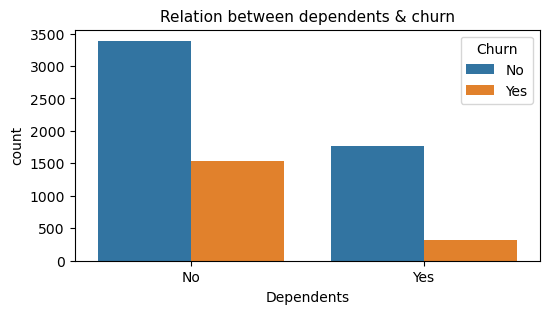

In [27]:
#Create plot
fig, ax = plt.subplots(figsize = (6,3))
ax.set_title("Relation between dependents & churn",size=11)
sns.countplot(x='Dependents', hue='Churn', data=CC)
plt.show()

Customers without dependents are more likely to churn.

In [28]:
#relation between SeniorCitizen and churn
pd.crosstab(CC["SeniorCitizen"],CC["Churn"])

Churn,No,Yes
SeniorCitizen,,
0,4497,1393
1,666,476


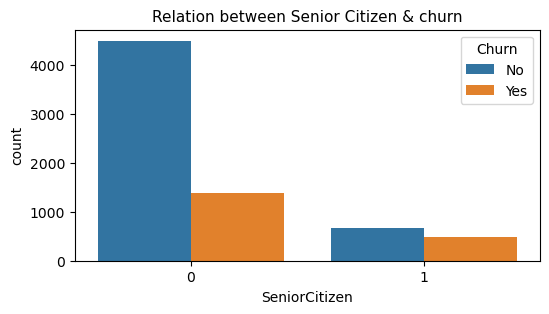

In [29]:
#Create plot
fig, ax = plt.subplots(figsize = (6,3))
ax.set_title("Relation between Senior Citizen & churn",size=11)
sns.countplot(x='SeniorCitizen', hue='Churn', data=CC)
plt.show()

In [30]:
#relation between Onlinesecurity and churn
pd.crosstab(CC["OnlineSecurity"],CC["Churn"])

Churn,No,Yes
OnlineSecurity,,
No,2036,1461
No internet service,1407,113
Yes,1720,295


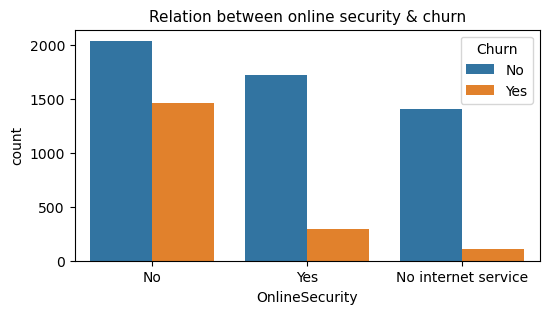

In [31]:
#Create plot
fig, ax = plt.subplots(figsize = (6,3))
ax.set_title("Relation between online security & churn",size=11)
sns.countplot(x='OnlineSecurity', hue='Churn', data=CC)
plt.show()

In [32]:
#relation between PaperlessBilling and churn
pd.crosstab(CC["PaperlessBilling"],CC["Churn"])

Churn,No,Yes
PaperlessBilling,,
No,2395,469
Yes,2768,1400


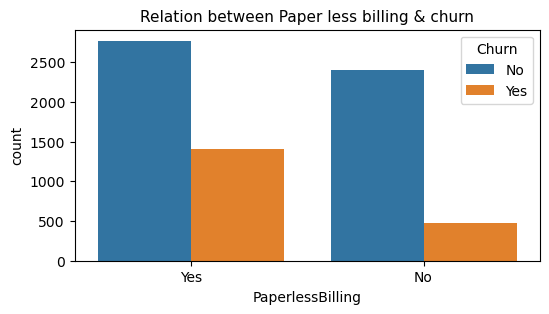

In [33]:
#Create plot
fig, ax = plt.subplots(figsize = (6,3))
ax.set_title("Relation between Paper less billing & churn",size=11)
sns.countplot(x='PaperlessBilling', hue='Churn', data=CC)
plt.show()

Customers with paperless billing are more likely to churn.

In [34]:
#relation between TechSupport and churn
pd.crosstab(CC["TechSupport"],CC["Churn"])

Churn,No,Yes
TechSupport,,
No,2026,1446
No internet service,1407,113
Yes,1730,310


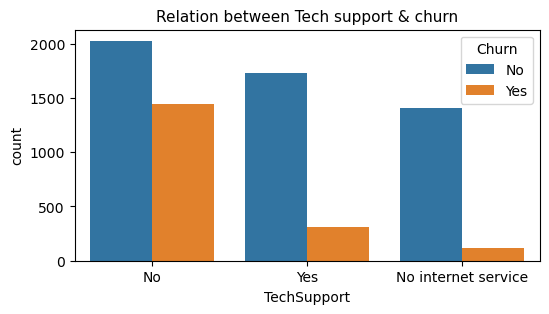

In [35]:
#Create plot
fig, ax = plt.subplots(figsize = (6,3))
ax.set_title("Relation between Tech support & churn",size=11)
sns.countplot(x='TechSupport', hue='Churn', data=CC)
plt.show()

Customers with no TechSupport are most likely to migrate to another service provider.

In [36]:
#relation between PhoneService and churn
pd.crosstab(CC["PhoneService"],CC["Churn"])

Churn,No,Yes
PhoneService,,
No,510,170
Yes,4653,1699


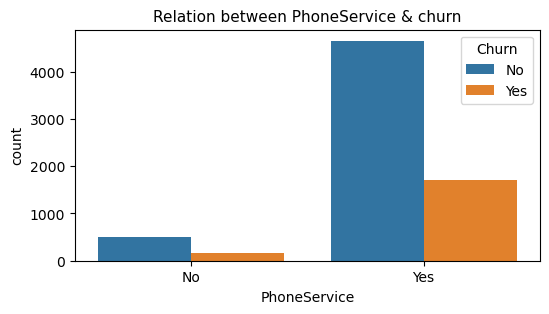

In [37]:
#Create plot
fig, ax = plt.subplots(figsize = (6,3))
ax.set_title("Relation between PhoneService & churn",size=11)
sns.countplot(x='PhoneService', hue='Churn', data=CC)
plt.show()

In [38]:
#relation between Tenure and churn
pd.crosstab(CC["tenure"],CC["Churn"],normalize="columns")

Churn,No,Yes
tenure,,
1,0.045129,0.203317
2,0.022274,0.065811
3,0.020531,0.050294
4,0.018013,0.044409
5,0.013364,0.034243
...,...,...
68,0.017625,0.004815
69,0.016851,0.004280
70,0.020918,0.005886


New customers are more likely to churn

# Feature Engineering

In [39]:
#Label Encoding
CC["gender"] = CC["gender"].map({"Female":0,"Male":1})
CC["Partner"] = CC["Partner"].map({"No":0,"Yes":1})
CC["Dependents"] = CC["Dependents"].map({"No":0,"Yes":1})
CC["PhoneService"] = CC["PhoneService"].map({"No":0,"Yes":1})
CC["PaperlessBilling"] = CC["PaperlessBilling"].map({"No":0,"Yes":1})
CC["Churn"]=CC["Churn"].map({"No":0,"Yes":1})

In [40]:
#creating dummies
CC = pd.get_dummies(CC,drop_first=True)

# Model Building

# Logistic Regression

In [41]:
#import packages
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score,classification_report
from sklearn import metrics 

In [42]:
#Define independent and dependent variables
X = CC.drop(columns = "Churn") 
y = CC['Churn']

In [43]:
#splitting the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =12)

In [44]:
#Initialize the Logistic Regression Model
Lgr_model = LogisticRegression()

In [45]:
#Fit the model on the training data
Lgr_model.fit(X_train, y_train)

/Users/shivanisankaran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
#Train Accuracy
Lgr_model.score(X_train,y_train)

0.8043478260869565

In [47]:
#Test Accuracy
Lgr_model.score(X_test,y_test)

0.8028436018957346

In [48]:
#Predict the values on the test set
y_pred = Lgr_model.predict(X_test)

In [49]:
#Classification Report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1567
           1       0.63      0.57      0.60       543

    accuracy                           0.80      2110
   macro avg       0.74      0.73      0.73      2110
weighted avg       0.80      0.80      0.80      2110



In [50]:
prob_test_1=Lgr_model.predict_proba(X_test)[:,1] #return the probabilities of a classification label

In [51]:
def classification_eva(act, pred, probs):
    ac1=metrics.accuracy_score(act, pred)
    rc1=metrics.recall_score(act, pred)
    pc1=metrics.precision_score(act, pred)
    f1=metrics.f1_score(act, pred)
    auc1=metrics.roc_auc_score(act, pred)
    result={"Accuracy":ac1, "Recall":rc1, "Precision":pc1, "F1 score":f1, "AUC":auc1}
    false_positive_rate, true_positive_rate, threshold=metrics.roc_curve(act,probs)
    plt.plot([0,1],[0,1],'k--', label="AUC: "+str(auc1))
    plt.plot(false_positive_rate,true_positive_rate)
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.legend()
    plt.show()
    return result

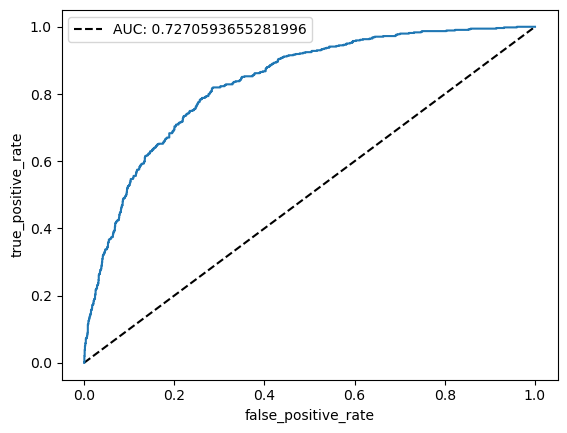

{'Accuracy': 0.8028436018957346,
 'Recall': 0.570902394106814,
 'Precision': 0.6288032454361054,
 'F1 score': 0.5984555984555985,
 'AUC': 0.7270593655281996}

In [52]:
 classification_eva(y_test,y_pred,prob_test_1)

In [53]:
avg_time = timer(Lgr_model.predict, X_test[:1], num_times=10)
print(f"Average time for LogisticRegression model for 1 input sample is {avg_time}")

Average time for LogisticRegression model for 1 input sample is 0.0017589330673217773


# Decision Tree

In [54]:
#import packages
from sklearn.tree import DecisionTreeClassifier

In [55]:
#using RandomizedsearchCV for hyperparameter tuning
params = {"criterion":["gini", "entropy"], 
"max_depth": [2,3,4,5,7,9],
"min_samples_split" :[5,10,15,20,50,100],
"min_samples_leaf" : [5,10,15,20,50,80,100]
       }

Dtc_model = DecisionTreeClassifier(random_state=0)
random_search = RandomizedSearchCV(estimator=Dtc_model,param_distributions=params , cv=10, n_jobs=2)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
                   n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 7, 9],
                                        'min_samples_leaf': [5, 10, 15, 20, 50,
                                                             80, 100],
                                        'min_samples_split': [5, 10, 15, 20, 50,
                                                              100]})

Gini: measures the impurity of the node split,The range of value Gini Impurity can have is between 0 to 0.5. 
The lesser the Gini Impurity, the better the split is.A Gini Impurity of 0 denotes a pure node 
and 0.5 denotes a most impure node.It aims to reduce the impurity score from the root node of the tree 
to the leaf node.

Entropy: Also measures the impurity of the node split, does log calculation. Each node splits based on a condition
and results in ‘Yes’ or ‘No’. The positive class is the number of samples that fall under ‘Yes’ 
and the negative class is the number of samples that fall under ‘No’.The range of values Entropy can have is 
between 0 to 1.Entropy of 0 denotes a pure node and 1 denotes most impure node,where we have 50–50 split of ‘Yes’ 
and ‘No’.

In [56]:
random_search.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=10,
                       random_state=0)

In [57]:
#training the model using best values of hyperparameters
Dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=50,
                       random_state=0)

In [58]:
#Fit the model on the training data
Dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=50,
                       random_state=0)

In [59]:
#Train Accuracy
Dt.score(X_train,y_train) 

0.8179601787891101

In [60]:
#Test Accuracy
Dt.score(X_test,y_test) 

0.7843601895734598

In [61]:
#Predict the values on the test set
y_pred_dt = Dt.predict(X_test)

In [62]:
#Classification Report
print(metrics.classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1567
           1       0.60      0.50      0.55       543

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.78      2110



In [63]:
prob_test_2 = Dt.predict_proba(X_test)[:,1] #return the probabilities of a classification label

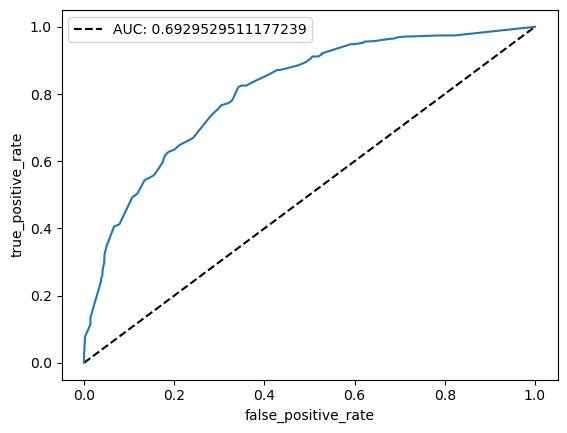

{'Accuracy': 0.7843601895734598,
 'Recall': 0.5046040515653776,
 'Precision': 0.5956521739130435,
 'F1 score': 0.5463609172482552,
 'AUC': 0.6929529511177239}

In [64]:
#Model Evaluation
classification_eva(y_test,y_pred_dt,prob_test_2)

In [65]:
avg_time = timer(Dt.predict, X_test[:1], num_times=10)
print(f"Average time for DecisionTree model for 1 input sample is {avg_time}")

Average time for DecisionTree model for 1 input sample is 0.0016827106475830079


# Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
#using RandomizedsearchCV for hyperparameter tuning
params_Rf = {"criterion":["gini","entropy"],
          "max_depth":[9,11,13,15,17,20],
          "min_samples_split":[20,50,100,200],
          "min_samples_leaf":[2,5,20,10],
          "n_estimators":[50,100,150,200],
          "bootstrap":[True],
          "max_features":["sqrt","log2"],
          "max_samples":[.7,.75,.8,.9]
          }

RandomSearch_Rf = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=params_Rf,cv=5,n_jobs=2)
RandomSearch_Rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=2,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [9, 11, 13, 15, 17, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_samples': [0.7, 0.75, 0.8, 0.9],
                                        'min_samples_leaf': [2, 5, 20, 10],
                                        'min_samples_split': [20, 50, 100, 200],
                                        'n_estimators': [50, 100, 150, 200]})

In [68]:
RandomSearch_Rf.best_estimator_

RandomForestClassifier(max_depth=20, max_samples=0.7, min_samples_leaf=10,
                       min_samples_split=20)

In [69]:
#training the model using best values of hyperparameters
Rf = RandomForestClassifier(max_depth=11, max_samples=0.8, min_samples_leaf=5, min_samples_split=50, n_estimators=50,
                       random_state=0)

In [70]:
#Fit the model on the training data
Rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, max_samples=0.8, min_samples_leaf=5,
                       min_samples_split=50, n_estimators=50, random_state=0)

In [71]:
#Train Accuracy
Rf.score(X_train,y_train) 

0.818772856562373

In [72]:
#Test Accuracy
Rf.score(X_test,y_test)

0.8056872037914692

In [73]:
#Predict the values on the test set
y_pred_Rf = Rf.predict(X_test)

In [74]:
#Classification Report
print(metrics.classification_report(y_test,y_pred_Rf))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1567
           1       0.66      0.51      0.58       543

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [75]:
prob_test_3 = Rf.predict_proba(X_test)[:,1] #return the probabilities of a classification label

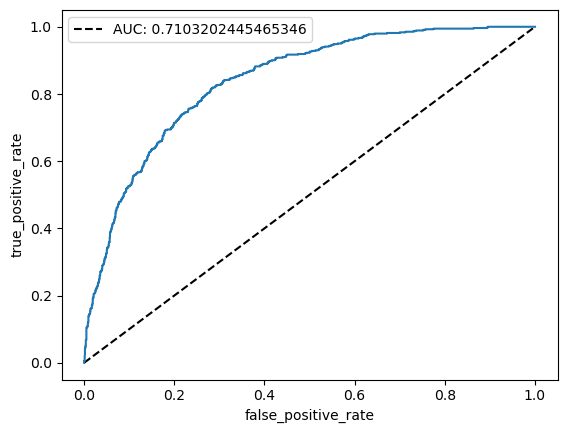

{'Accuracy': 0.8056872037914692,
 'Recall': 0.5138121546961326,
 'Precision': 0.6564705882352941,
 'F1 score': 0.5764462809917354,
 'AUC': 0.7103202445465346}

In [76]:
#Model Evaluation
classification_eva(y_test,y_pred_Rf,prob_test_3)

In [77]:
avg_time = timer(Rf.predict, X_test[:1], num_times=10)
print(f"Average time for RandomForest model for 1 input sample is {avg_time}")

Average time for RandomForest model for 1 input sample is 0.0034168004989624024


# Conclusion:

Used Logistic Regression, Decision Tree and Random Forest for Model Development. Based on the evaluation of models, Logistic Regression, has accuracy of about 80%, better recall and precision value and average time taken to execute is than the other two models.